In [2]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from keras.models import Model
from keras.layers import Input, Conv2D, Conv2DTranspose
from keras.layers import Activation, BatchNormalization, LeakyReLU

In [3]:
IMAGE_SIZE = 256

In [4]:
# Load the image
def load_image(image_path):
    image = Image.open(image_path)
    image = image.resize((IMAGE_SIZE, IMAGE_SIZE))
    image = np.array(image) / 255.0
    return image

In [6]:
# Generator model
def build_generator():
    # Encoder
    input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)
    input_image = Input(shape=input_shape)

    # Downsample
    down1 = Conv2D(64, (4, 4), strides=(2, 2), padding='same')(input_image)
    down1 = LeakyReLU(alpha=0.2)(down1)

    down2 = Conv2D(128, (4, 4), strides=(2, 2), padding='same')(down1)
    down2 = BatchNormalization()(down2)
    down2 = LeakyReLU(alpha=0.2)(down2)

    down3 = Conv2D(256, (4, 4), strides=(2, 2), padding='same')(down2)
    down3 = BatchNormalization()(down3)
    down3 = LeakyReLU(alpha=0.2)(down3)

    down4 = Conv2D(512, (4, 4), strides=(2, 2), padding='same')(down3)
    down4 = BatchNormalization()(down4)
    down4 = LeakyReLU(alpha=0.2)(down4)

    down5 = Conv2D(512, (4, 4), strides=(2, 2), padding='same')(down4)
    down5 = BatchNormalization()(down5)
    down5 = LeakyReLU(alpha=0.2)(down5)

    down6 = Conv2D(512, (4, 4), strides=(2, 2), padding='same')(down5)
    down6 = BatchNormalization()(down6)
    down6 = LeakyReLU(alpha=0.2)(down6)

    down7 = Conv2D(512, (4, 4), strides=(2, 2), padding='same')(down6)
    down7 = BatchNormalization()(down7)
    down7 = LeakyReLU(alpha=0.2)(down7)

    down8 = Conv2D(512, (4, 4), strides=(2, 2), padding='same')(down7)
    down8 = BatchNormalization()(down8)
    down8 = LeakyReLU(alpha=0.2)(down8)

    # Upsample
    up1 = Conv2DTranspose(512, (4, 4), strides=(2, 2), padding='same')(down8)
    up1 = BatchNormalization()(up1)
    up1 = Activation('relu')(up1)
    up1 = tf.keras.layers.Concatenate()([up1, down7])

    up2 = Conv2DTranspose(512, (4, 4), strides=(2, 2), padding='same')(up1)
    up2 = BatchNormalization()(up2)
    up2 = Activation('relu')(up2)
    up2 = tf.keras.layers.Concatenate()([up2, down6])

    up3 = Conv2DTranspose(512, (4, 4), strides=(2, 2), padding='same')(up2)
    up3 = BatchNormalization()(up3)
    up3 = Activation('relu')(up3)
    up3 = tf.keras.layers.Concatenate()([up3, down5])

    up4 = Conv2DTranspose(512, (4, 4), strides=(2, 2), padding='same')(up3)
    up4 = BatchNormalization()(up4)
    up4 = Activation('relu')(up4)
    up4 = tf.keras.layers.Concatenate()([up4, down4])

    up5 = Conv2DTranspose(256, (4, 4), strides=(2, 2), padding='same')(up4)
    up5 = BatchNormalization()(up5)
    up5 = Activation('relu')(up5)
    up5 = tf.keras.layers.Concatenate()([up5, down3])

    up6 = Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same')(up5)
    up6 = BatchNormalization()(up6)
    up6 = Activation('relu')(up6)
    up6 = tf.keras.layers.Concatenate()([up6, down2])

    up7 = Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same')(up6)
    up7 = BatchNormalization()(up7)
    up7 = Activation('relu')(up7)
    up7 = tf.keras.layers.Concatenate()([up7, down1])

    # Output
    output = Conv2DTranspose(3, (4, 4), strides=(2, 2), padding='same')(up7)
    output = Activation('tanh')(output)

    generator = Model(input_image, output)
    return generator


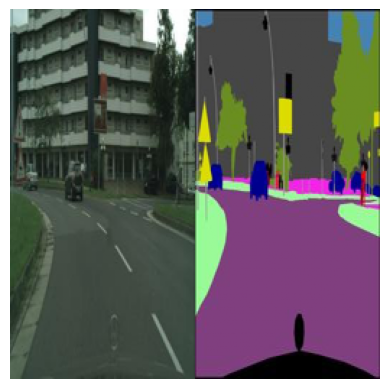

Image loaded successfully.
1/1 [==============================] - 3s 3s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


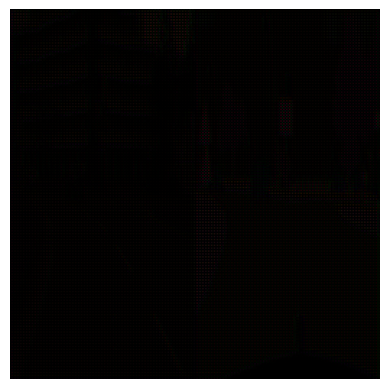

Image translated successfully.


In [10]:
# Load the image
path = r"C:\Users\DELL\Desktop\ML LAB TASKS\Pix2Pix-GAN-Image-to-Image-Translation\cityscapes\train"
image_filename = "1.jpg"
image_path = os.path.join(path, image_filename)

if os.path.exists(image_path):
    image = load_image(image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    print("Image loaded successfully.")
    # Perform GAN image-to-image translation
    generator = build_generator()
    # Process the image using the generator
    translated_image = generator.predict(np.expand_dims(image, axis=0))
    translated_image = np.squeeze(translated_image, axis=0)

    # Display the translated image
    plt.imshow(translated_image)
    plt.axis('off')
    plt.show()
    print("Image translated successfully.")
else:
    print(f"Image file '{image_filename}' not found in the specified directory.")

In [11]:
# Save the translated image
output_folder = r"C:\Users\DELL\Desktop\ML LAB TASKS\Pix2Pix-GAN-Image-to-Image-Translation\translated_images"
os.makedirs(output_folder, exist_ok=True)

output_filename = os.path.splitext(image_filename)[0] + "_translated.jpg"
output_path = os.path.join(output_folder, output_filename)

translated_image = np.clip(translated_image, 0, 1)
translated_image = (translated_image * 255).astype(np.uint8)
Image.fromarray(translated_image).save(output_path)

print(f"Translated image saved successfully: {output_path}")

Translated image saved successfully: C:\Users\DELL\Desktop\ML LAB TASKS\Pix2Pix-GAN-Image-to-Image-Translation\translated_images\1_translated.jpg
